In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
list_D=[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

In [29]:
9*np.array(list_D)

array([ 0.9,  1.8,  2.7,  3.6,  5.4,  7.2,  9. , 10.8, 12.6])

In [3]:
data_m_par={}
data_rho_par={}

data_m_seq={}
data_rho_seq={}

for D in list(list_D):
    # m //
    data_m_par[D]=pd.read_csv('avg_prof_D_v2/D%s/f_bands_m.dat'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(400)])
    data_m_par[D]=(data_m_par[D].dropna(axis='rows')).values
    
    # rho //
    data_rho_par[D]=pd.read_csv('avg_prof_D_v2/D%s/f_bands_rho.dat'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(400)])
    data_rho_par[D]=(data_rho_par[D].dropna(axis='rows')).values
    
    # m --> 
    data_m_seq[D]=pd.read_csv('../diag_rhol_D_supdate/avg_prof_D_v2/D%s/f_bands_m.dat'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_m_seq[D]=(data_m_seq[D].dropna(axis='rows')).values

    # rho --> 
    data_rho_seq[D]=pd.read_csv('../diag_rhol_D_supdate/avg_prof_D_v2/D%s/f_bands_rho.dat'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_rho_seq[D]=(data_rho_seq[D].dropna(axis='rows')).values

In [4]:
def align_prof(data):

    th=np.max(data[-1,:])/2

    t0, x0 = np.where((data<=th)&(np.roll(data,-5, axis=1)>=th))
    x1=x0[np.unique(t0, return_index=True)[1]]

    t0, x0 = np.where((data>=th)&(np.roll(data,-5, axis=1)<th))
    x2=x0[np.unique(t0, return_index=True)[1]]

    dx=[]
    for t in range(data.shape[0]):
        if x2[t]>x1[t]:
            dx.append(np.int64(0.5*(x2[t]+x1[t]-400)))
        else:
            dx.append(np.int64(0.5*(x2[t]+x1[t])))

    dx=np.array(dx)


    avg_prof=np.mean([np.roll(data[t, :], 
                             -dx[t]) 
                     for t in range(0, data.shape[0]) 
                     #if x2_p[D][t]>x1_p[D][t]+50
                          ]
        , axis=0)
   
    
    return(avg_prof)

In [5]:
avg_prof_m_par={}
avg_prof_rho_par={}

avg_prof_m_seq={}
avg_prof_rho_seq={}

for D in list_D:
    avg_prof_m_par[D]=align_prof(data_m_par[D])
    avg_prof_rho_par[D]=align_prof(data_rho_par[D])
    
    avg_prof_m_seq[D]=align_prof(data_m_seq[D])
    avg_prof_rho_seq[D]=align_prof(data_rho_seq[D])

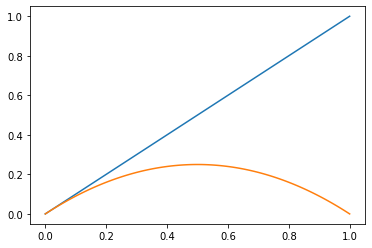

In [12]:
u=np.linspace(0,1, 100)
plt.plot(u, u)
plt.plot(u, u*(1-u))

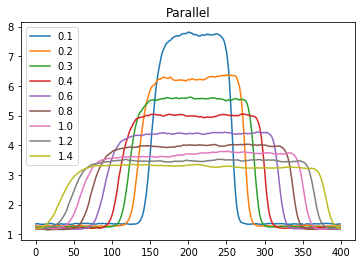

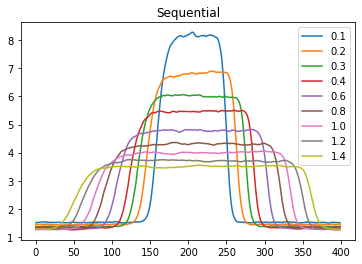

In [14]:
for D in list_D:
    try:
        plt.plot(avg_prof_rho_par[D], label=D)

        plt.legend()
    except: pass
    
plt.title('Parallel')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_rho_seq[D], label=D)

        plt.legend()
    except: pass

plt.title('Sequential');


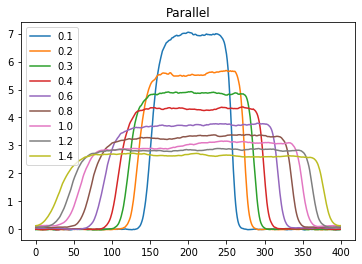

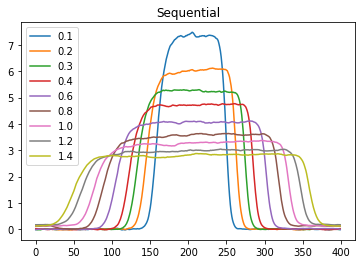

In [15]:
for D in list_D:
    try:
        plt.plot(avg_prof_m_par[D], label=D)

        plt.legend()
    except: pass
    
plt.title('Parallel')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_m_seq[D], label=D)

        plt.legend()
    except: pass

plt.title('Sequential');


In [16]:
rhol0_p={}
rhog0_p={}

for D in list_D:
    try:
        rhol0_p[D]=np.mean(avg_prof_rho_par[D][170:230])
        rhog0_p[D]=np.mean(np.roll(avg_prof_rho_par[D], 200)[180:220])
    except: pass

In [17]:
rhol0_s={}
rhog0_s={}

for D in list_D:
    rhol0_s[D]=np.mean(avg_prof_rho_seq[D][170:230])
    rhog0_s[D]=np.mean(np.roll(avg_prof_rho_seq[D], 200)[180:220])
    

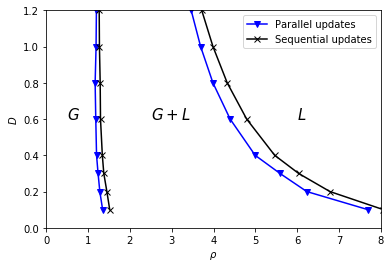

In [18]:
u=list(rhol0_p)
plt.plot([rhol0_p[D] for D in u], u, 'bv-', label='Parallel updates')
plt.plot([rhog0_p[D] for D in u], u, 'bv-')

plt.plot([rhol0_s[D] for D in u], u, 'kx-', label='Sequential updates')
plt.plot([rhog0_s[D] for D in u], u, 'kx-')

plt.xlim(0,8)
plt.ylim(0,1.2)

plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

plt.savefig('rho0_D_on_latt.pdf')

Text(0, 0.5, '$D$')

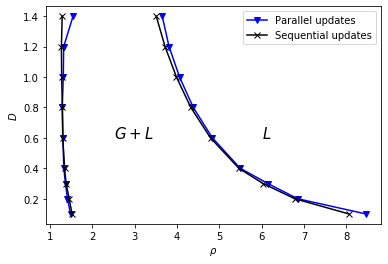

In [19]:
u=list(rhol0_p)
a=1.1
plt.plot([rhol0_p[D]*a for D in u], u, 'bv-', label='Parallel updates')
plt.plot([rhog0_p[D]*a for D in u], u, 'bv-')

plt.plot([rhol0_s[D] for D in u], u, 'kx-', label='Sequential updates')
plt.plot([rhog0_s[D] for D in u], u, 'kx-')


plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

In [20]:
from scipy.optimize import fixed_point

In [21]:
alpha=fixed_point(lambda x : np.tanh(2*x), x0=0.5)

In [22]:
1/alpha

1.0443820337608334

In [27]:
u=np.array(u)

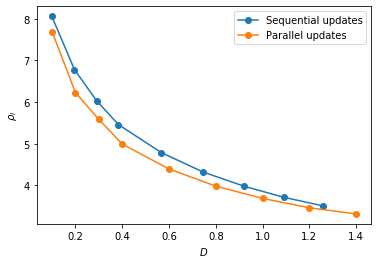

In [28]:
plt.plot(u*(1-u/(4*u+1+np.exp(2))), [rhol0_s[D] for D in u], 'o-', label='Sequential updates')
plt.plot(u, [rhol0_p[D]for D in u], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

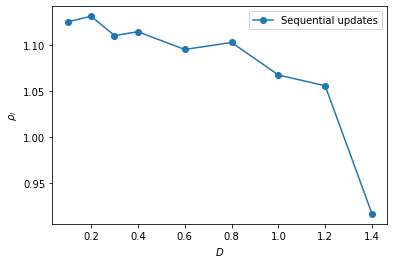

In [89]:
plt.plot(u, [rhog0_s[D]/rhog0_p[D] for D in u], 'o-', label='Sequential updates')
#plt.plot(list_D, [ for D in list_D], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

# $\langle m \rangle$

In [85]:
mag_seq={}
mag_par={}
for D in list_D:
    print(D)
    mag_seq[D]=pd.read_csv('../diag_rhol_D_supdate/avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    try:
        mag_par[D]=pd.read_csv('avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    except:pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2
1.4


In [86]:
mag_par

{0.1: 0.60469098,
 0.2: 0.6397413399999999,
 0.3: 0.6583876399999999,
 0.4: 0.67888496,
 0.6: 0.70418634,
 0.8: 0.7255469600000001,
 1.0: 0.7396983,
 1.2: 0.7524533400000002,
 1.4: 0.7632057600000001}

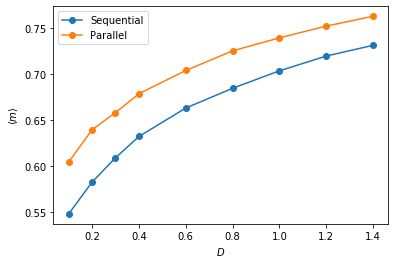

In [87]:
plt.plot(list_D, [mag_seq[D] for D in list_D], 'o-', label='Sequential')
plt.plot(list_D, [mag_par[D] for D in list_D], 'o-', label='Parallel')

plt.xlabel(r'$D$')
plt.ylabel(r'$\langle m \rangle$')

plt.legend()